(60000, 28, 28)
(10000, 28, 28)


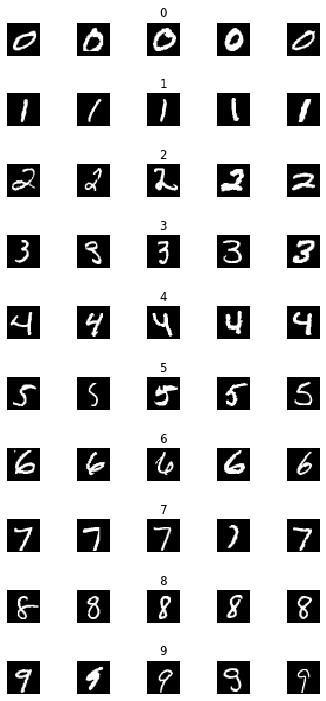

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dropout
from keras.models import Model
import random
np.random.seed(0)

(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
# LeNet model
def leNet_model():
  model = Sequential()
  # same padding ensures the output size is same as input size whan kernel is filtering. (not specified here bc we don't care what is around the border of the image)
  # stride is how many pixels the kernel traverses each time 
  # This layer contains 30 5x5 filters
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # This layer contains 15 3x3 filters
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten()) # flatten before feeding into fully connected layer
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5)) # ad droput layer to reduce overfitting
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [35]:
model = leNet_model()
print(model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               188000    
____

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.2461 - acc: 0.9215 - val_loss: 0.0493 - val_acc: 0.9860
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0697 - acc: 0.9787 - val_loss: 0.0388 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0598 - acc: 0.9813 - val_loss: 0.0524 - val_acc: 0.9853
Epoch 4/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.0486 - acc: 0.9851 - val_loss: 0.0377 - val_acc: 0.9893
Epoch 5/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.0435 - acc: 0.9862 - val_loss: 0.0409 - val_acc: 0.9885
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0425 - acc: 0.9867 - val_loss: 0.0323 - val_acc: 0.9920
Epoch 7/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0338 - val_acc:

Text(0.5, 0, 'epoch')

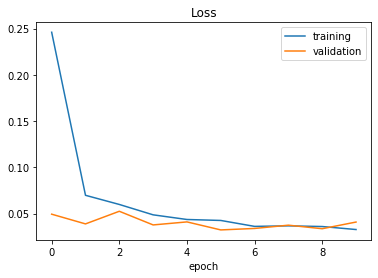

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

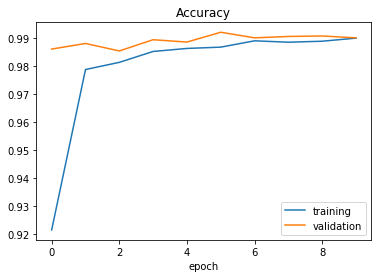

In [38]:
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [39]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.04141717360977
Test accuracy: 0.989


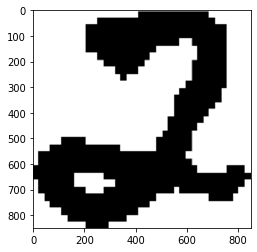

In [40]:
from PIL import Image
import requests
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

predicted digit: [2]


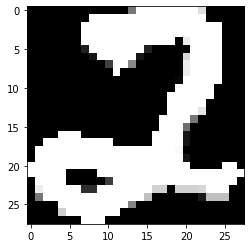

In [41]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


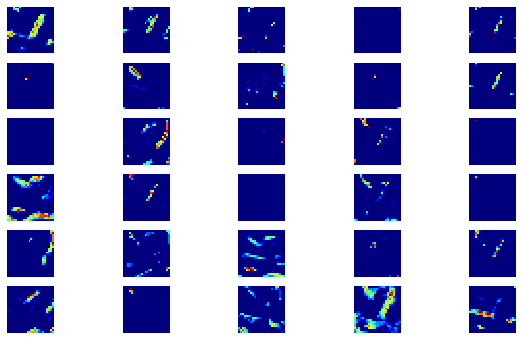

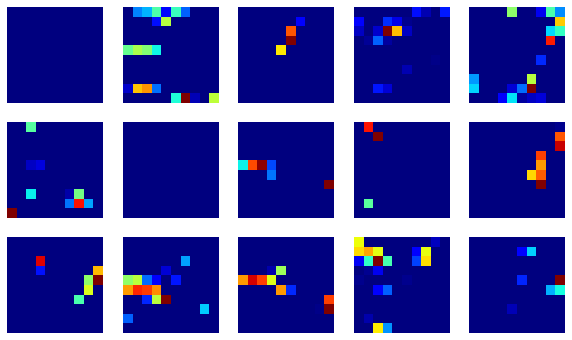

In [43]:
# Model the two convolutional layers in our model to analyse the output

layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6))
# cycle through the 30 filters in the image
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
